In [1]:
# Plotting some loss functions.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
print('Ready')

Ready


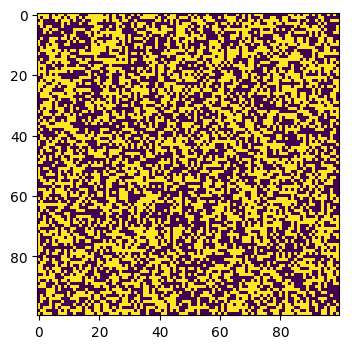

In [2]:
# Define a random ground truth image.
yt = np.random.random((100,100)).round()
plt.imshow(yt)
plt.show()

In [3]:
# Define the cost functions.
def log_loss(yt, yp):
    '''https://www.kaggle.com/wiki/LogarithmicLoss'''
    return (-yt * np.log(yp)) - ((1 - yt) * np.log(1 - yp))

def dice_squared_loss(yt, yp):
    nmr = 2 * np.sum(yt * yp)
    dnm = np.sum(yt**2) + np.sum(yp**2) + 1e-7
    return nmr / dnm

funcs = [(dice_squared_loss, 'b')]

print('Ready')

Ready


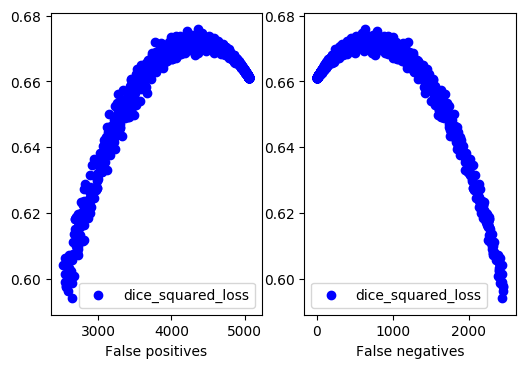

In [5]:
# Generate random windows and plot the cost function value
# relative the false positives and false negatives.

fig, _ = plt.subplots(1, 2)
fig.axes[0].set_xlabel('False positives')
fig.axes[1].set_xlabel('False negatives')

for n in range(1000):
    yp = np.clip(np.random.random((100,100)) + np.random.rand(), 0, 1)
    for (func, c) in funcs:
        loss = func(yt, yp)
        fp = np.sum(np.clip(yp - yt, 0, 1))
        fn = np.sum(np.clip(yt - yp, 0, 1))
        if n == 0:
            fig.axes[0].scatter(fp, loss, color=c, label=func.__name__)
            fig.axes[0].legend()
            fig.axes[1].scatter(fn, loss, color=c, label=func.__name__)
            fig.axes[1].legend()
        else:
            fig.axes[0].scatter(fp, loss, color=c)
            fig.axes[1].scatter(fn, loss, color=c)

plt.show()